In [9]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [7]:
import numpy as np
from tensorflow import keras

In [10]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [11]:
# compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

In [12]:
xs = np.array([-1,0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3, -1, 1.0, 3.0, 5.0, 7.0], dtype=float)


In [15]:
model.fit(xs, ys, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0135
Epoch 2/300
1/1 [==============================] - 0s 6ms/step - loss: 0.0132
Epoch 3/300
1/1 [==============================] - 0s 0s/step - loss: 0.0129
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 0.0126
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 0.0124
Epoch 6/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 0.0119
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0114
Epoch 10/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0112
Epoch 11/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 12/300
1/1 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 13/300
1/1 [==============================] - 0s 0s/step

In [16]:
model.predict([10.0])

1/1 [==============================] - 0s 39ms/step


array([[18.984797]], dtype=float32)

### Working with Mnist dataset 

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [3]:
# mnist dataset is avilable within tensorflow - api call
mnist_data = tf.keras.datasets.fashion_mnist

In [8]:
# load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [9]:
train_images.shape

(60000, 28, 28)

In [11]:
import matplotlib.pyplot as plt

In [12]:
np.set_printoptions(linewidth=320)


In [16]:
print(f'label : {train_labels[1]}')
print(f'image : {train_images[1]}')

label : 0
image : [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16 

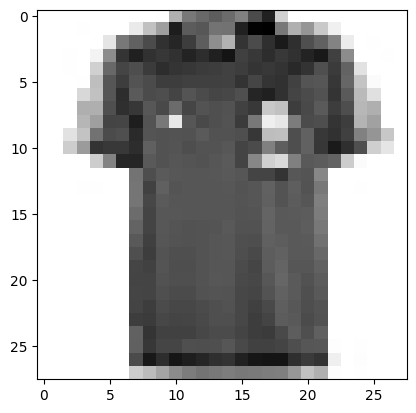

In [29]:
plt.imshow(train_images[2300], cmap='Greys')

In [19]:
# normalize the pixel valies of the train and test images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [20]:
# design the model
# input layer with shape of the data 
# output layer with sape of classes

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [30]:
# declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function : {inputs.numpy()}')

# feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax funtion : {outputs.numpy()}')

# get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# get the index with highest values
prediction = np.argmax(outputs)
print(f'class wtih highest probability : {prediction}')

input to softmax function : [[1. 3. 4. 2.]]
output of softmax funtion : [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class wtih highest probability : 2


In [31]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2801 - accuracy: 0.8974
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2695 - accuracy: 0.8999
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2608 - accuracy: 0.9036
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2482 - accuracy: 0.9082
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2387 - accuracy: 0.9111
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2318 - accuracy: 0.9126
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2235 - accuracy: 0.9170
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2190 - accuracy: 0.9175
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2116 - accuracy: 0.9207
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.205

In [35]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.8897


[0.43687427043914795, 0.8896999955177307]